In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('sal_train.csv')
df.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
df['workclass'].nunique

<bound method IndexOpsMixin.nunique of 0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
30156              Private
30157              Private
30158              Private
30159              Private
30160         Self-emp-inc
Name: workclass, Length: 30161, dtype: object>

In [31]:
df.shape

(30161, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [33]:
df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [34]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [71]:
# importing testing data
test_df = pd.read_csv('sal_test.csv')
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [72]:
from sklearn.preprocessing import LabelEncoder

# Train dataset

le = LabelEncoder()
cat_var = [col for col in df.columns if df[col].dtype == 'object' ]
df[cat_var] = df[cat_var].apply(le.fit_transform)
df



le1 = LabelEncoder()
cat_var = [col for col in test_df.columns if test_df[col].dtype == 'object' ]
test_df[cat_var] = test_df[cat_var].apply(le.fit_transform)


Text(0.5, 1.0, 'Test Dataset')

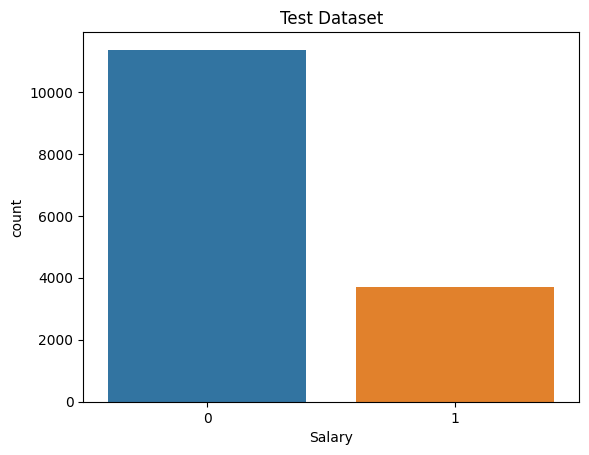

In [79]:
sns.countplot(x=test_df['Salary'])
plt.title('Test Dataset')

<Axes: >

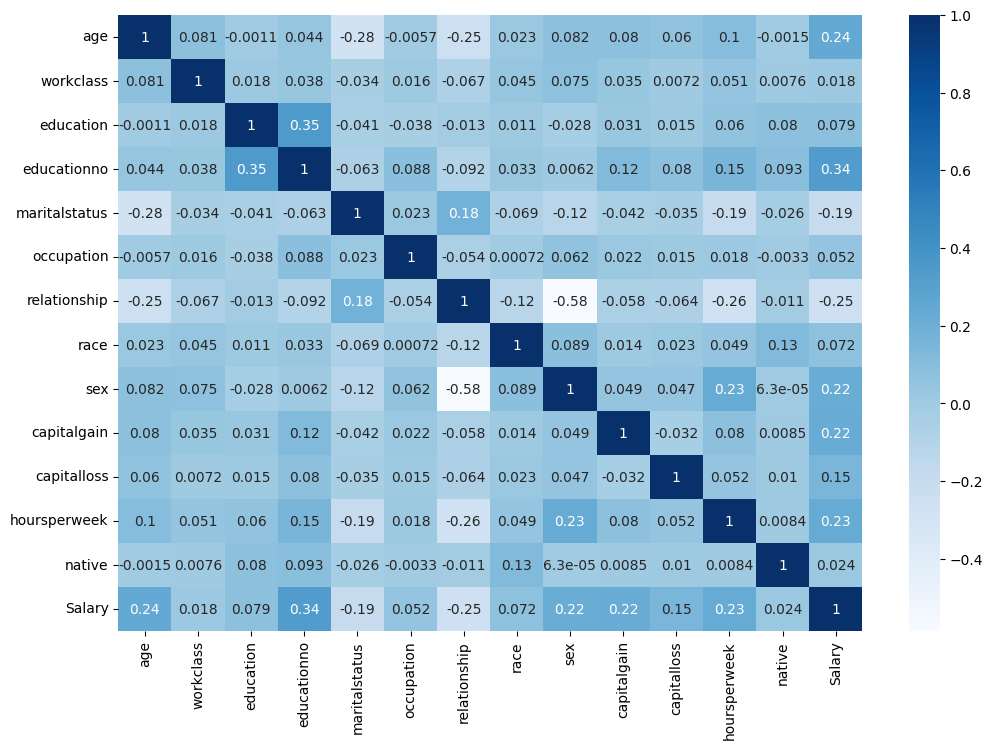

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [37]:
# find the index of categorical variable
# cat_var = [df.columns.get_loc(col) for col in df.columns if df[col].dtype == 'object' and col not in ['Salary'] ]


# cat_var
X = df.iloc[:,[0,4,8,9,10]]
y = test_df.iloc[:,-1] 


Text(0.5, 1.0, 'Train Dataset')

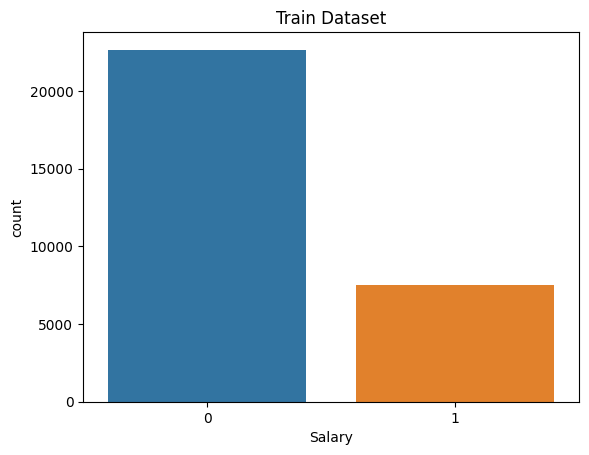

In [80]:
sns.countplot(x=df['Salary'])
plt.title('Train Dataset')

In [81]:
from sklearn.feature_selection import chi2,SelectKBest

chi2_features = SelectKBest(chi2,k=5)

X_best_feature = chi2_features.fit_transform(X,y)

  
# Reduced features
# print('Original feature number:', X.shape[1])
# print('Reduced feature number:', X_kbest.shape[1])
print(X_best_feature)

[[   39     4     1  2174     0]
 [   50     2     1     0     0]
 [   38     0     1     0     0]
 ...
 [   58     6     0     0     0]
 [   22     4     1     0     0]
 [   52     2     0 15024     0]]


In [82]:
from sklearn.feature_selection import chi2,SelectKBest
chi_scores = chi2(X,y)
chi_scores


(array([7.92714625e+03, 9.82227659e+02, 4.59219298e+02, 7.41246624e+07,
        1.25878577e+06]),
 array([0.00000000e+000, 1.31028796e-215, 7.10862994e-102, 0.00000000e+000,
        0.00000000e+000]))

In [83]:
X.columns

Index(['age', 'maritalstatus', 'sex', 'capitalgain', 'capitalloss'], dtype='object')

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(random_state=123)
x_smote, y_smote = smt.fit_resample(X, y)

print('original',Counter(y))
print('Resample',Counter(y_smote))


original Counter({0: 22653, 1: 7508})
Resample Counter({0: 22653, 1: 22653})


<Axes: xlabel='Salary', ylabel='count'>

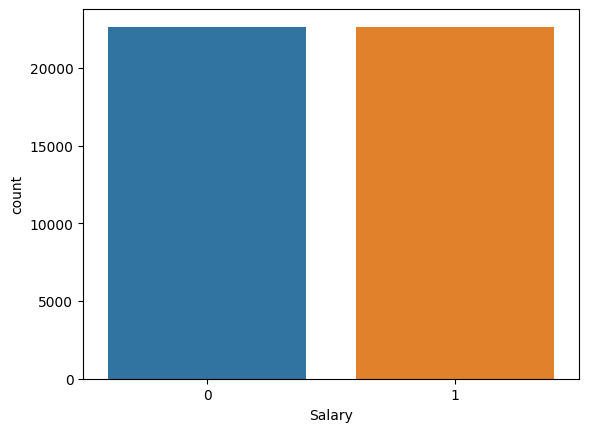

In [43]:
sns.countplot(x=y_smote)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=123)



In [86]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)


In [87]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(n_splits=200,shuffle=True,random_state=123)

In [88]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [89]:
acc_score = cross_val_score(classifier,x_smote,y_smote,cv=kfold)
print(np.mean(acc_score))

0.6266400920042102


In [90]:
classifier.score(X_train,y_train)

0.6276073281094802

In [91]:
classifier.score(X_test,y_test)

0.6258000441403664

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix , accuracy_score
accuracy_score(y_test,y_pred)

0.6258000441403664

<Axes: >

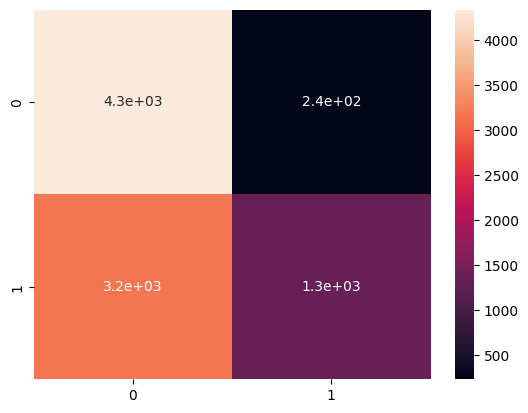

In [94]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.95      0.72      4571
           1       0.85      0.30      0.44      4491

    accuracy                           0.63      9062
   macro avg       0.71      0.62      0.58      9062
weighted avg       0.71      0.63      0.58      9062

